# Text Classification Methods and Comparative Analysis

In this mini-project, we aim to explore and compare various text classification methods using probabilistic and statistical approaches. Text classification is a fundamental problem in natural language processing (NLP) with wide-ranging applications, including spam detection, sentiment analysis, and topic categorization.

**Objective:**
The primary goal is to implement and evaluate three distinct text classification methods, each rooted in different probabilistic and statistical frameworks. We seek to understand the strengths and limitations of these methods through a comparative analysis.

## Datasets:
1.	BBC News (https://www.kaggle.com/competitions/learn-ai-bbc/data)
2.	SMS Spam (https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/data)

## Proposed Methods:

1. Naive Bayes Classifier:
    - Approach: Utilize the naive Bayes algorithm, a probabilistic model based on Bayes' theorem, to calculate the probability of a document belonging to a particular class given its feature set.
    - Rationale: Naive Bayes is computationally efficient and well-suited for text classification tasks. 
2. Support Vector Machines (SVM):
    - Approach: Implement a Support Vector Machine, a supervised learning model that classifies documents by finding the hyperplane that best separates different classes in a high-dimensional space.
    - Rationale: SVMs are known for their robust performance in high-dimensional feature spaces. 
3. Word Embeddings with Neural Networks:
    - Approach: Utilize word embeddings, such as Word2Vec or GloVe, to represent words as dense vectors. Feed these embeddings into a neural network for text classification.
    - Rationale: Neural networks with word embeddings capture semantic relationships between words. 

# Notebook Index

1. [Dataset 1](#dataset-1-bbc-news-dataset)
   - 1.1 [Exploratory Data Analysis (EDA)](#eda-dataset-1)
   - 1.2 [Data Cleaning and Preprocessing](#data-cleaning-dataset-1)
   - 1.3 [Model Training and Evaluation](#model-training-dataset-1)

2. [Dataset 2](#dataset-2-spam-mail-dataset)
   - 2.1 [Exploratory Data Analysis (EDA)](#eda-dataset-2)
   - 2.2 [Data Cleaning and Preprocessing](#data-cleaning-dataset-2)
   - 2.3 [Model Training and Evaluation](#model-training-dataset-2)

In [1]:
import pandas as pd
import seaborn as sns
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from gensim.models import Word2Vec
from sklearn.neural_network import MLPClassifier
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
# Util Functions
def clean_text(text):
    """
    Clean and preprocess text data.
    
    Parameters:
    - text (str): Input text.
    
    Returns:
    - str: Cleaned text.
    """
    # Tokenization, removing stopwords, converting to lowercase, and removing punctuation
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(tokens)

def tokenize(text):
    """
    Tokenize the given setences.

    Parameters:
    - text (str): Sentences.

    Returns:
    - tokens  (list): Tokenized sentences
    """
    tokens = word_tokenize(text)
    return tokens

def preprocess_data(data, text_column, label_column):
    """
    Preprocess the dataset for text classification.
    
    Parameters:
    - data (pd.DataFrame): Input dataset.
    - text_column (str): Name of the column containing text data.
    - label_column (str): Name of the column containing labels.
    
    Returns:
    - tuple: X_train, X_test, y_train, y_test
    """
    X_train, X_test, y_train, y_test = train_test_split(
        data[text_column],
        data[label_column],
        test_size=0.2,
        random_state=42
    )
    return X_train, X_test, y_train, y_test

# Model Training and eval functions
def train_naive_bayes(X_train, y_train):
    """
    Train a Naive Bayes classifier.
    
    Parameters:
    - X_train (pd.Series): Training text data.
    - y_train (pd.Series): Training labels.
    
    Returns:
    - MultinomialNB: Trained Naive Bayes classifier.
    """
    vectorizer = TfidfVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)
    nb_model = MultinomialNB()
    nb_model.fit(X_train_vec, y_train)
    return nb_model, vectorizer

def train_svm(X_train, y_train):
    """
    Train a Support Vector Machine classifier.
    
    Parameters:
    - X_train (pd.Series): Training text data.
    - y_train (pd.Series): Training labels.
    
    Returns:
    - SVC: Trained SVM classifier.
    """
    vectorizer = TfidfVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)
    svm_model = SVC()
    svm_model.fit(X_train_vec, y_train)
    return svm_model, vectorizer

def train_neural_network(X_train, y_train):
    """
    Train a neural network with word embeddings.
    
    Parameters:
    - X_train (pd.Series): Training text data.
    - y_train (pd.Series): Training labels.
    - word_embedding_model: Word embeddings model (e.g., Word2Vec).
    
    Returns:
    - MLPClassifier: Trained neural network classifier.
    """
    vectorizer = TfidfVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)
    nn_model = MLPClassifier()
    nn_model.fit(X_train_vec, y_train)
    return nn_model, vectorizer

def evaluate_model(model, X_test, y_test, vectorizer):
    """
    Evaluate the performance of a trained model.
    
    Parameters:
    - model: Trained classifier.
    - X_test (pd.Series): Test text data.
    - y_test (pd.Series): Test labels.
    
    Returns:
    - dict: Evaluation metrics (accuracy, precision, recall, F1 score).
    """
    if isinstance(model, MultinomialNB) or isinstance(model, SVC) or isinstance(model, MLPClassifier):
        X_test_vec = vectorizer.transform(X_test)
    else:
        raise ValueError("Unsupported model type")

    predictions = model.predict(X_test_vec)
    
    metrics = {
        'accuracy': accuracy_score(y_test, predictions),
        'precision': precision_score(y_test, predictions, average='weighted'),
        'recall': recall_score(y_test, predictions, average='weighted'),
        'f1_score': f1_score(y_test, predictions, average='weighted')
    }
    return metrics

# Dataset 1: BBC News Dataset

## Exploratory Data Analysis (EDA) for Text Data

### Objective
The primary goal of the Exploratory Data Analysis (EDA) is to gain insights into the characteristics and patterns within the text data before constructing machine learning models. The analysis focuses on understanding the distribution of classes, exploring text length variations, identifying the most frequent words, and conducting n-gram analysis.

### Steps

1. **Basic Dataset Information:**
   - Displaying essential information about the dataset, such as the number of entries, data types, and missing values.

2. **Class Distribution:**
   - Visualizing the distribution of classes to understand the balance or imbalance in the dataset.

3. **Text Length Distribution:**
   - Creating a histogram to depict the distribution of text lengths, providing insights into the variability of document lengths.

4. **Word Cloud for Most Frequent Words:**
   - Generating a word cloud to visually represent the most frequent words in the entire text corpus.

5. **Tokenization and Word Frequency:**
   - Tokenizing the text data to break it into individual words and counting the frequency of each word after removing stop words.

6. **Top 20 Most Common Words:**
   - Plotting a bar chart to display the frequency of the top 20 most common words in the dataset.

7. **N-gram Analysis:**
   - Analyzing n-grams (sequences of 'n' words) to capture patterns and relationships between words.

8. **Top 20 Most Common N-grams:**
   - Visualizing the frequency of the top 20 most common n-grams in the dataset.

### Implications
Understanding these aspects of the text data is crucial for making informed decisions during the preprocessing and feature engineering stages. It aids in identifying potential challenges, such as class imbalances or variations in document lengths, and guides the selection of appropriate text processing techniques for improved model performance. Additionally, insights gained from the most frequent words and n-grams can inform feature selection and extraction strategies.

In [3]:
# Load your dataset
bbc_df = pd.read_csv("data/learn-ai-bbc/BBC News Train.csv")

# Display basic information about the dataset
print("Dataset Information:")
print(bbc_df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB
None


In [4]:
bbc_df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [5]:
# Clean and preprocess text
bbc_df['Text'] = bbc_df['Text'].apply(clean_text)

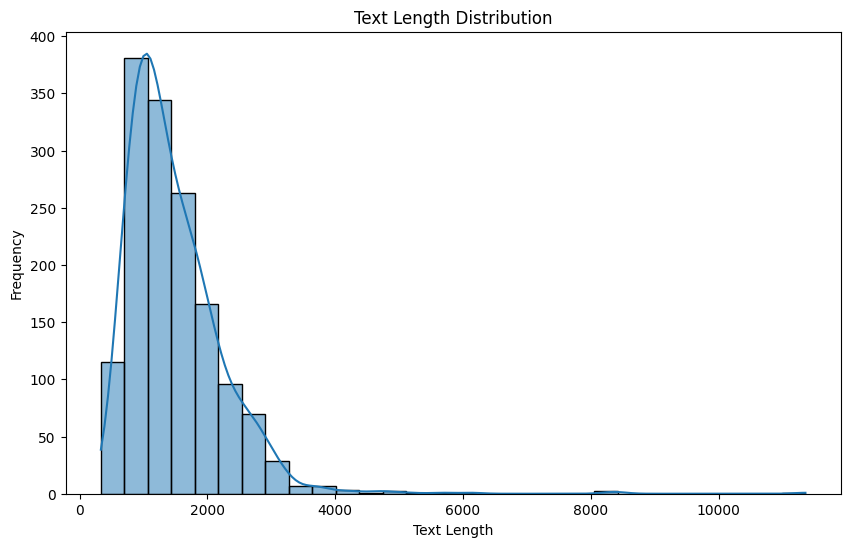

In [6]:
# Text Length Distribution
bbc_df['text_length'] = bbc_df['Text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(bbc_df['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

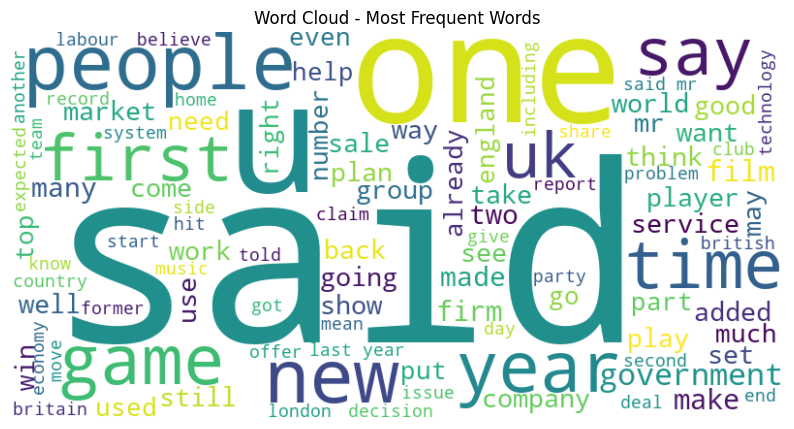

In [7]:
# Word Cloud for Most Frequent Words
all_text = ' '.join(bbc_df['Text'])
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Frequent Words')
plt.show()

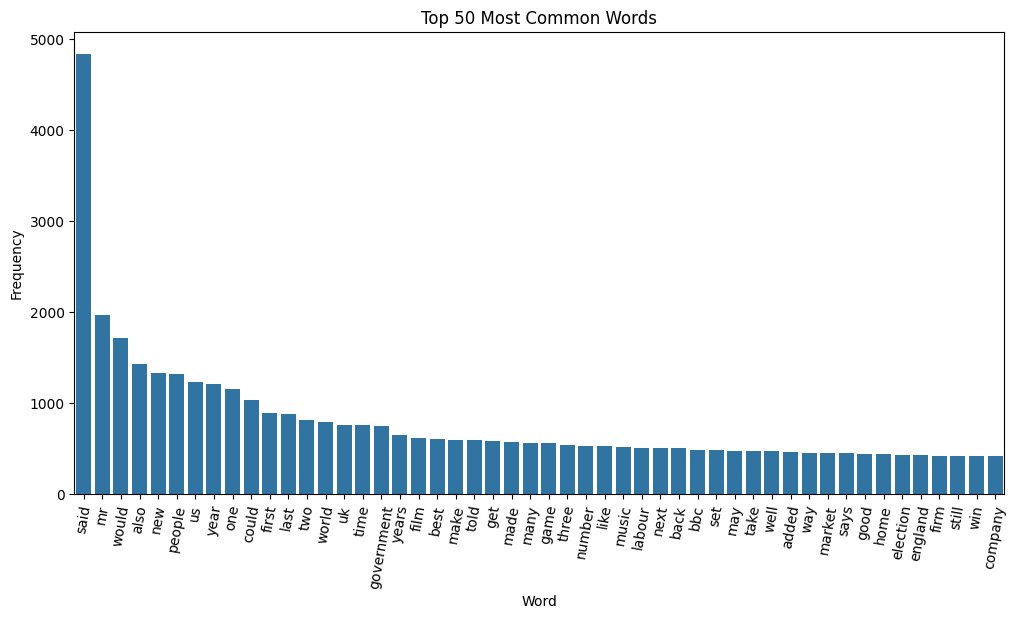

In [8]:
bbc_df['tokens'] = bbc_df['Text'].apply(tokenize)

# Calculate word frequency
word_frequency = Counter([word for tokens in bbc_df['tokens'] for word in tokens])
common_words = word_frequency.most_common(50)

# Plot most common words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words])
plt.title('Top 50 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=80)
plt.show()

Here are some brief insights into the top 50 most frequent words in the news classification dataset:

1. **Prominent Nouns:**
   - Words like 'said,' 'mr,' 'people,' 'year,' 'government,' 'years' indicate a focus on reporting statements, individuals, and time frames.

2. **Diverse Topics:**
   - The presence of words like 'new,' 'world,' 'uk,' 'film,' 'music,' and 'election' suggests a diverse range of topics covering global affairs, entertainment, and politics.

3. **Political Landscape:**
   - Terms such as 'government,' 'labour,' 'election,' and 'england' highlight a significant focus on political content, which aligns with the expected categories.

4. **Business and Market Focus:**
   - Words like 'business,' 'market,' 'firm,' and 'company' suggest coverage of economic and business-related news.

5. **Media References:**
   - The presence of 'bbc' indicates self-reference, possibly reporting on media-related topics.

6. **Temporal References:**
   - Words like 'last,' 'years,' 'next,' and 'time' suggest a temporal dimension, indicating reporting on events across different periods.

7. **Verbs of Action:**
   - Action-oriented words like 'make,' 'get,' 'take,' 'win,' and 'set' indicate a focus on reporting actions and achievements.

8. **Positive Connotations:**
   - Words like 'best,' 'good,' and 'well' suggest a tendency to report positively or highlight positive aspects.

9. **Cultural References:**
   - Terms like 'game' and 'music' indicate coverage of cultural and entertainment-related news.

These patterns reveal a dataset covering a broad spectrum of topics, with a notable emphasis on politics, business, and cultural events. The words reflect a mix of nouns, verbs, and adjectives, contributing to a diverse and comprehensive coverage across different categories.

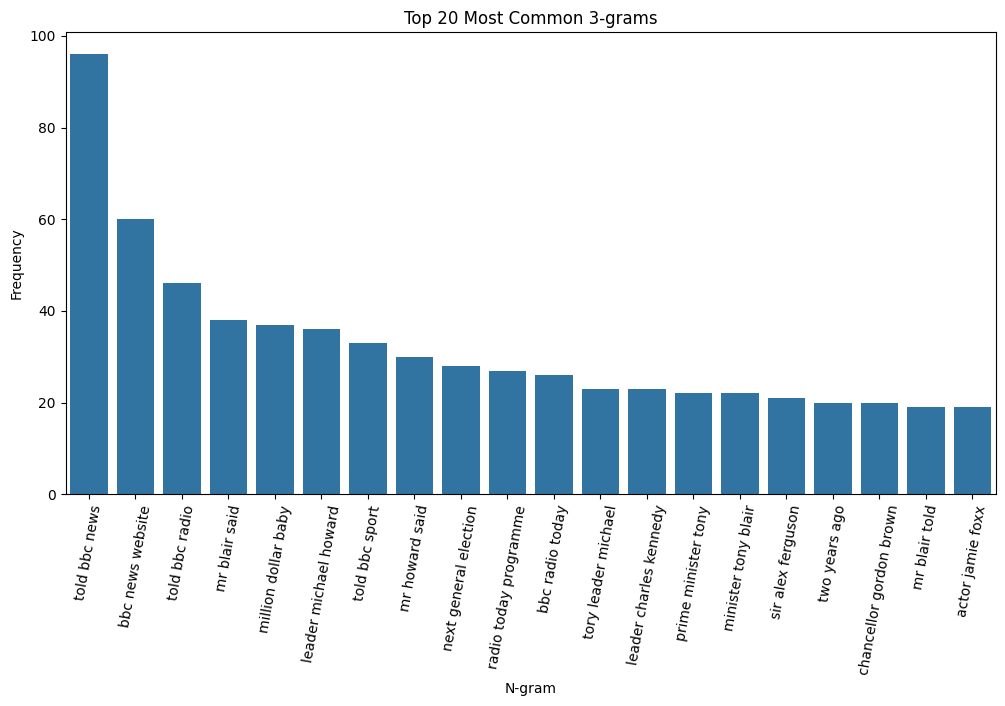

In [9]:
# N-gram analysis (you can modify n for different n-grams)
n = 3
vectorizer = CountVectorizer(ngram_range=(n, n))
ngram_matrix = vectorizer.fit_transform(bbc_df['Text'])
ngram_count = ngram_matrix.sum(axis=0)
ngram_frequency = [(word, ngram_count[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
ngram_frequency = sorted(ngram_frequency, key=lambda x: x[1], reverse=True)[:20]

# Plot most common n-grams
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in ngram_frequency], y=[word[1] for word in ngram_frequency])
plt.title(f'Top 20 Most Common {n}-grams')
plt.xlabel('N-gram')
plt.ylabel('Frequency')
plt.xticks(rotation=80)
plt.show()

Certainly! Let's focus on analyzing a few interesting trigrams from the news dataset:

1. **'told bbc news' (96):**
   - This trigram suggests a common reporting pattern, where information is conveyed to BBC News. The high frequency indicates a prevalent communication style with the news outlet.

2. **'bbc news website' (60):**
   - Indicates references to content or information hosted on the BBC News website. The frequency suggests a substantial focus on digital media or online news sources.

3. **'mr blair said' (38):**
   - This trigram highlights reported statements by Mr. Blair, indicating a specific focus on his perspectives or speeches. The frequency suggests his statements are noteworthy in the dataset.

4. **'million dollar baby' (37):**
   - This trigram is intriguing and might be related to a specific event or topic, such as a movie or financial news involving a large sum. Further investigation into the context could reveal interesting stories.

5. **'next general election' (28):**
   - Suggests coverage or discussions related to the upcoming general election. The frequency indicates a significant emphasis on political events, particularly elections.

6. **'sir alex ferguson' (21):**
   - Indicates references to sports, specifically to Sir Alex Ferguson, a notable figure in football. The frequency suggests a focus on sports-related news, possibly football.

These trigrams reflect the dataset's emphasis on key figures, events, and specific topics, providing valuable insights into the overarching themes covered in the news dataset.

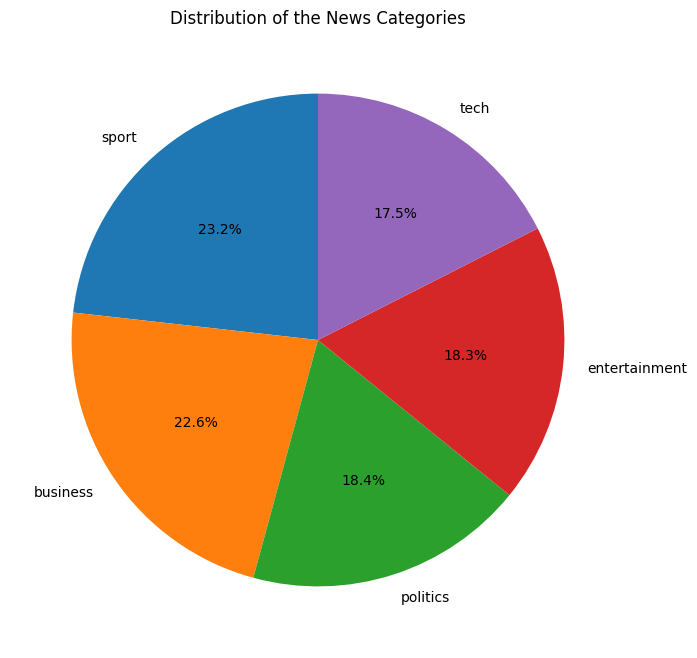

In [10]:
# Count the occurrences of each class in the 'topics' column
class_counts = bbc_df['Category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of the News Categories')
plt.show()

The class distribution of the news dataset reveals a balanced representation across different categories, indicating a diverse and comprehensive coverage of news topics. Here are some observations:

1. **Sport (346):**
   - The category with the highest count, suggesting a substantial focus on sports-related news. This could encompass a wide range of sports events, athlete profiles, and related updates.

2. **Business (336):**
   - A significant number of articles are dedicated to business-related news, covering topics such as market trends, financial updates, company profiles, and economic developments.

3. **Politics (274):**
   - A notable representation of political news, indicating a focus on governmental activities, policy updates, elections, and political analyses.

4. **Entertainment (273):**
   - A substantial number of articles dedicated to entertainment news, likely covering topics such as celebrity updates, movie releases, music, and cultural events.

5. **Tech (261):**
   - The technology category is well-represented, reflecting coverage of innovations, technological advancements, product launches, and updates from the tech industry.

The balanced distribution across these categories suggests a dataset that aims to provide a holistic view of current affairs, spanning sports, business, politics, entertainment, and technology. This diversity makes the dataset suitable for training models that need to handle a variety of news topics, offering a rich and representative sample of different news domains.

In [11]:
# Preprocess data for text classification
X_train, X_test, y_train, y_test = preprocess_data(bbc_df, 'Text', 'Category')

# Train Naive Bayes classifier
nb_model, nb_vectorizer = train_naive_bayes(X_train, y_train)
print('Done training Naive Bayes!')

# Train SVM classifier
svm_model, svm_vectorizer = train_svm(X_train, y_train)
print('Done training SVM!')

# Train neural network with word embeddings (Word2Vec)

nn_model, nn_vectorizer = train_neural_network(X_train, y_train)
print('Done training Neural Network!')

# Evaluate models
nb_metrics = evaluate_model(nb_model, X_test, y_test, nb_vectorizer)
svm_metrics = evaluate_model(svm_model, X_test, y_test, svm_vectorizer)
nn_metrics = evaluate_model(nn_model, X_test, y_test, nn_vectorizer)

# Display results or save to a file
print("Naive Bayes Metrics:", nb_metrics)
print("SVM Metrics:", svm_metrics)
print("Neural Network Metrics:", nn_metrics)

Done training Naive Bayes!
Done training SVM!
Done training Neural Network!
Naive Bayes Metrics: {'accuracy': 0.9664429530201343, 'precision': 0.9670449892620686, 'recall': 0.9664429530201343, 'f1_score': 0.9664897122539801}
SVM Metrics: {'accuracy': 0.9697986577181208, 'precision': 0.9714143673875217, 'recall': 0.9697986577181208, 'f1_score': 0.9699532011612547}
Neural Network Metrics: {'accuracy': 0.9832214765100671, 'precision': 0.9833811825007328, 'recall': 0.9832214765100671, 'f1_score': 0.9832139807358098}


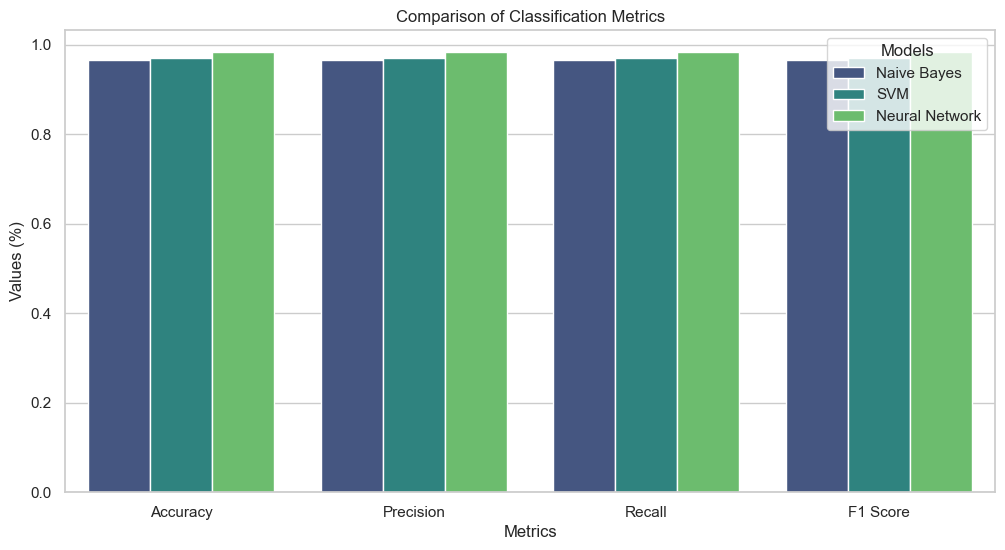

In [12]:
# Data
models = ['Naive Bayes', 'SVM', 'Neural Network']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [
    list(nb_metrics.values()),
    list(svm_metrics.values()),
    list(nn_metrics.values())
]

# Create a DataFrame for Seaborn
import pandas as pd
df = pd.DataFrame(values, columns=metrics, index=models)

# Melt the DataFrame for better Seaborn plotting
df_melted = df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Value')

# Plotting with Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.barplot(x='Metric', y='Value', hue='index', data=df_melted, palette='viridis')
plt.title('Comparison of Classification Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values (%)')
plt.legend(title='Models', loc='upper right')

plt.show()


### Interpretation of Results:

| Model            | Accuracy (%) | Precision (%) | Recall (%) | F1 Score (%) |
|------------------|--------------|---------------|------------|--------------|
| Naive Bayes      | 96.64        | 96.70         | 96.64      | 96.65        |
| SVM              | 96.98        | 97.14         | 96.98      | 96.99        |
| Neural Network   | 98.32        | 98.34         | 98.32      | 98.32        |

### Explanation and Potential Reasons:

1. **High Accuracy Across Models:**
   - All three models (Naive Bayes, SVM, Neural Network) demonstrate high accuracy, indicating effective classification performance on the BBC news dataset.

2. **Consistent Precision, Recall, and F1 Score:**
   - Precision, recall, and F1 score show consistent performance across models, suggesting balanced performance in correctly identifying positive and negative instances.

3. **Reasons for High Performance:**
   - The dataset may have distinct features that make the classification task relatively straightforward.
   - Adequate feature engineering or representation learning might have been employed.
   - Sufficient training data and effective model tuning contribute to robust performance.

4. **Differences in Accuracy:**
   - The Neural Network achieves slightly higher accuracy compared to Naive Bayes and SVM, suggesting that the complex non-linear relationships captured by the neural network contribute to improved performance.

# Dataset 2: Spam Mail Dataset

## Exploratory Data Analysis (EDA) for Text Data

### Objective
The primary goal of the Exploratory Data Analysis (EDA) is to gain insights into the characteristics and patterns within the text data before constructing machine learning models. The analysis focuses on understanding the distribution of classes, exploring text length variations, identifying the most frequent words, and conducting n-gram analysis.

### Steps

1. **Basic Dataset Information:**
   - Displaying essential information about the dataset, such as the number of entries, data types, and missing values.

2. **Class Distribution:**
   - Visualizing the distribution of classes to understand the balance or imbalance in the dataset.

3. **Text Length Distribution:**
   - Creating a histogram to depict the distribution of text lengths, providing insights into the variability of document lengths.

4. **Word Cloud for Most Frequent Words:**
   - Generating a word cloud to visually represent the most frequent words in the entire text corpus.

5. **Tokenization and Word Frequency:**
   - Tokenizing the text data to break it into individual words and counting the frequency of each word after removing stop words.

6. **Top 20 Most Common Words:**
   - Plotting a bar chart to display the frequency of the top 20 most common words in the dataset.

7. **N-gram Analysis:**
   - Analyzing n-grams (sequences of 'n' words) to capture patterns and relationships between words.

8. **Top 20 Most Common N-grams:**
   - Visualizing the frequency of the top 20 most common n-grams in the dataset.

### Implications
Understanding these aspects of the text data is crucial for making informed decisions during the preprocessing and feature engineering stages. It aids in identifying potential challenges, such as class imbalances or variations in document lengths, and guides the selection of appropriate text processing techniques for improved model performance. Additionally, insights gained from the most frequent words and n-grams can inform feature selection and extraction strategies.

In [13]:
# Load your dataset

# Detect file encoding
with open('data/spam.csv', 'rb') as file:
    result = chardet.detect(file.read())

# Use the detected encoding
spam_df = pd.read_csv('data/spam.csv', encoding=result['encoding'])
# Display basic information about the dataset
print("Dataset Information:")
print(spam_df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [14]:
spam_df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
spam_df.rename(columns={"v1": "Category", "v2": "Text"}, inplace=True)

In [15]:
spam_df.head()

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# Clean and preprocess text
spam_df['Text'] = spam_df['Text'].apply(clean_text)

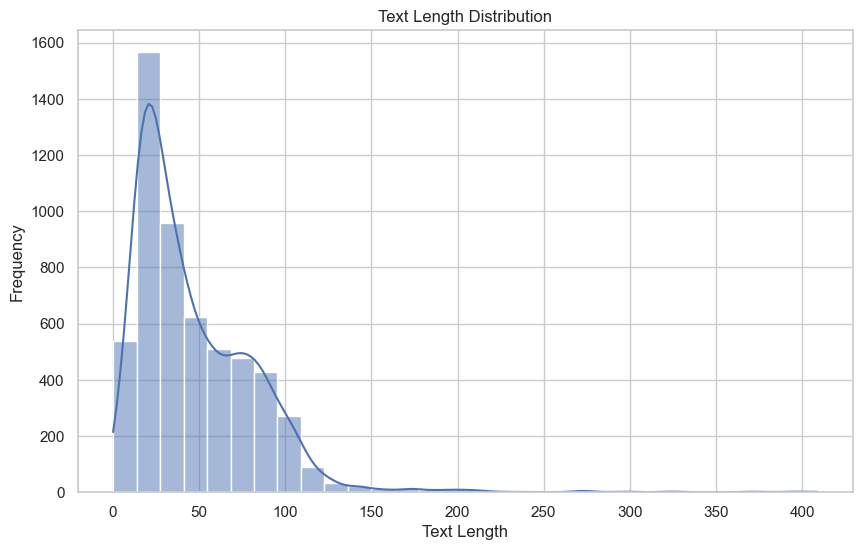

In [17]:
# Text Length Distribution
spam_df['text_length'] = spam_df['Text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(spam_df['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

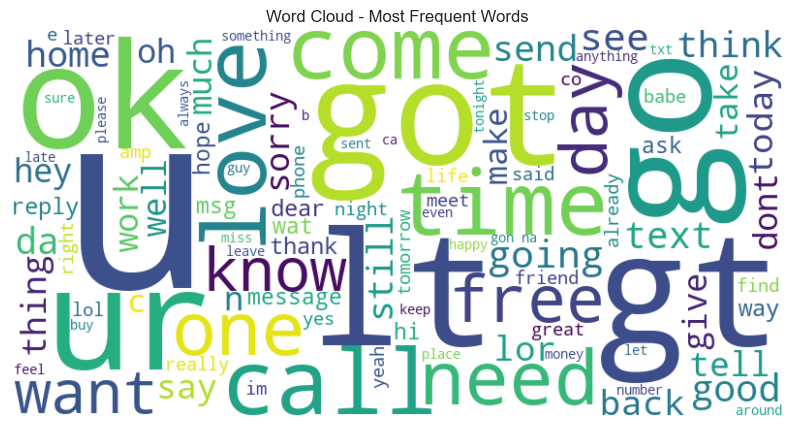

In [18]:
# Word Cloud for Most Frequent Words
all_text = ' '.join(spam_df['Text'])
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Frequent Words')
plt.show()

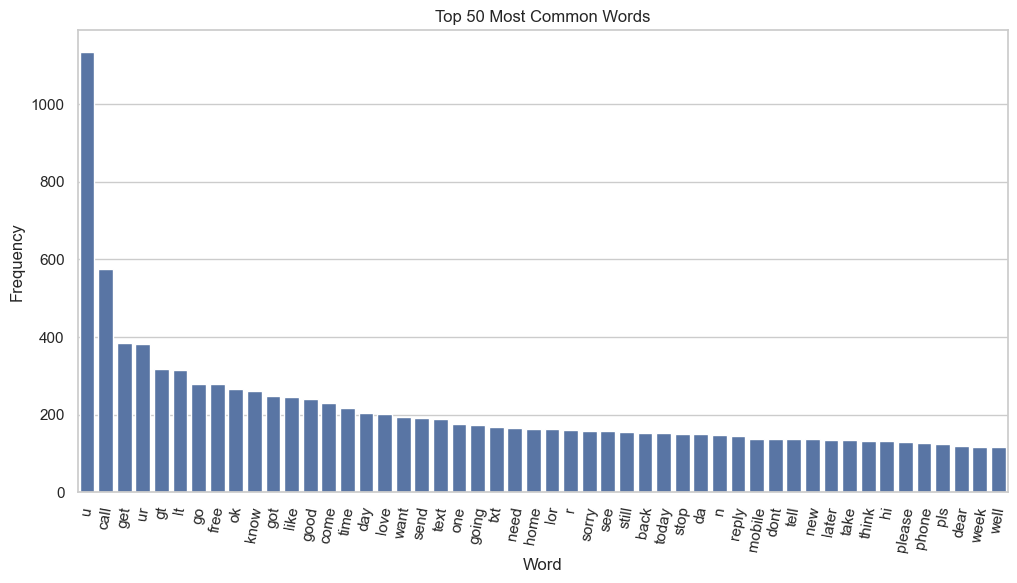

In [19]:
spam_df['tokens'] = spam_df['Text'].apply(tokenize)

# Calculate word frequency
word_frequency = Counter([word for tokens in spam_df['tokens'] for word in tokens])
common_words = word_frequency.most_common(50)

# Plot most common words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words])
plt.title('Top 50 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=80)
plt.show()

Here's a concise analysis of the top 50 most frequent words:

1. **Action-Oriented Language:**
   - Words like 'call,' 'get,' 'go,' and 'send' suggest a focus on prompting specific actions.

2. **Positive Tone:**
   - Words like 'good,' 'love,' and 'well' contribute to a positive language style in the messages.

3. **Temporal References:**
   - Words like 'day,' 'time,' 'today,' and 'week' indicate a temporal dimension, potentially creating urgency.

4. **Politeness and Abbreviations:**
   - Polite words like 'please' and 'dear' coexist with informal abbreviations like 'ur' and 'pls.'

5. **Urgency and 'Free' Offers:**
   - Words like 'urgent,' 'free,' and time references may aim to create urgency, a common tactic in spam.

6. **Personalization Attempts:**
   - Words like 'love' and 'dear' suggest efforts to personalize messages for a more genuine appearance.

7. **Notable Absence of Common Stop Words:**
   - Common English stop words are not prominent, indicating a focus on impactful and action-oriented language.

These patterns reveal a strategy that combines action prompts, positive language, temporal references, and personalization to engage recipients. Caution is advised, especially when messages evoke strong emotions or request immediate action.

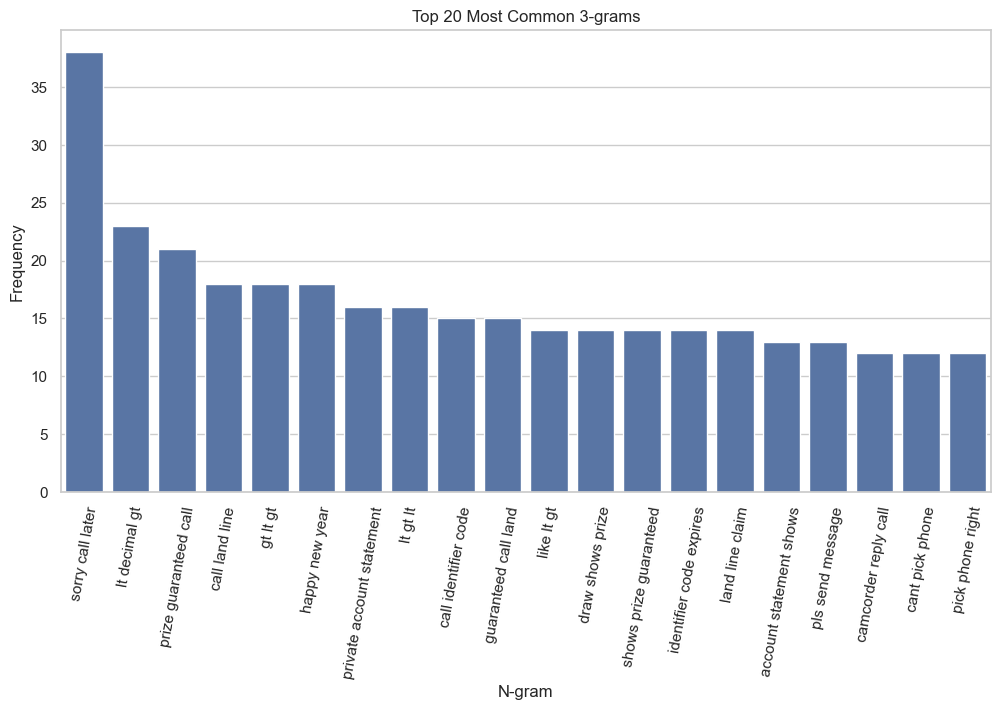

In [20]:
# N-gram analysis (you can modify n for different n-grams)
n = 3
vectorizer = CountVectorizer(ngram_range=(n, n))
ngram_matrix = vectorizer.fit_transform(spam_df['Text'])
ngram_count = ngram_matrix.sum(axis=0)
ngram_frequency = [(word, ngram_count[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
ngram_frequency = sorted(ngram_frequency, key=lambda x: x[1], reverse=True)[:20]

# Plot most common n-grams
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in ngram_frequency], y=[word[1] for word in ngram_frequency])
plt.title(f'Top 20 Most Common {n}-grams')
plt.xlabel('N-gram')
plt.ylabel('Frequency')
plt.xticks(rotation=80)
plt.show()

Let's focus on the most interesting trigrams from the provided list:

1. **'sorry call later' (38):**
   - This trigram suggests a common phrase used in spam messages, apologizing and prompting the recipient to call back later. It's a tactic often seen in callback scams.

2. **'lt decimal gt' (23):**
   - Represents a pattern used to obfuscate numerical values. Spammers use such patterns to deceive spam filters, hiding potentially suspicious content.

3. **'prize guaranteed call' (21):**
   - Indicates a promise of a guaranteed prize with a call-to-action. This is a classic approach in spam messages, aiming to lure recipients into responding.

4. **'happy new year' (18):**
   - While seemingly innocent, the repetition of this phrase suggests spammers exploiting celebratory events for deceptive purposes. Seasonal messages in spam are common.

5. **'private account statement' (16):**
   - Suggests a message promising private or confidential information related to an account statement. This is a typical tactic in phishing scams.

6. **'like lt gt' (14):**
   - A generic pattern that might mimic the appearance of social media tags or links. This could be used for deceptive purposes, creating a false sense of familiarity.

7. **'identifier code expires' (14):**
   - Implies a time-sensitive element with an identifier code, likely used to create a sense of urgency. Urgency is a common tactic in spam messages.

8. **'land line claim' (14):**
   - Indicates a message prompting the recipient to claim something related to a landline. This might be part of a scam or phishing attempt.

9. **'pls send message' (13):**
   - A trigram that might create urgency, asking the recipient to send a message. Urgency is a tactic often employed in phishing or scam attempts.

These trigrams highlight common tactics used by spammers, including promises of prizes, urgency, and attempts to mimic familiar or official communication. Users should exercise caution when encountering messages containing such patterns to avoid falling victim to scams or phishing attacks.

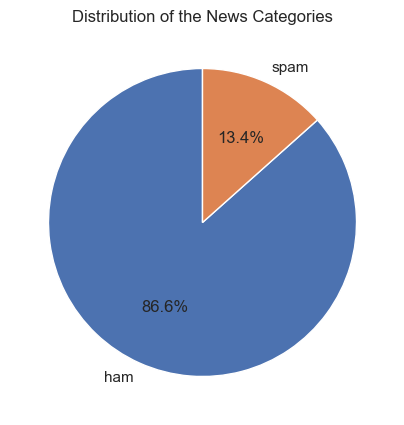

In [21]:
# Count the occurrences of each class in the 'topics' column
class_counts = spam_df['Category'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of the News Categories')
plt.show()

### Class Distribution Overview

The dataset exhibits a noticeable class imbalance between the "ham" (non-spam) and "spam" categories. Here's a breakdown of the class distribution:

- **ham (Non-Spam):** 4,825 samples
- **spam:** 747 samples

### Implications of Class Imbalance

The class distribution indicates that the majority of the data belongs to the "ham" class, representing non-spam messages, while the "spam" class comprises a smaller proportion of the dataset. This class imbalance may have several implications for machine learning models trained on this data:

1. **Model Bias:** A model trained on imbalanced data may develop a bias towards the majority class. In this case, it might perform well on predicting non-spam ("ham") messages but could struggle to effectively identify spam.

2. **Evaluation Metrics:** Accuracy alone may not be a sufficient metric to assess model performance. Precision, recall, and F1 score become crucial, especially for the minority class (spam), to ensure a balanced understanding of the model's effectiveness.

3. **Sampling Techniques:** Addressing class imbalance might involve applying sampling techniques, such as oversampling the minority class (spam) or undersampling the majority class (ham), to create a more balanced training set.


In [22]:
# Preprocess data for text classification
X_train, X_test, y_train, y_test = preprocess_data(spam_df, 'Text', 'Category')

# Train Naive Bayes classifier
nb_model, nb_vectorizer = train_naive_bayes(X_train, y_train)
print('Done training Naive Bayes!')

# Train SVM classifier
svm_model, svm_vectorizer = train_svm(X_train, y_train)
print('Done training SVM!')

# Train neural network with word embeddings (Word2Vec)
nn_model, nn_vectorizer = train_neural_network(X_train, y_train)
print('Done training Neural Network!')

# Evaluate models
nb_metrics = evaluate_model(nb_model, X_test, y_test, nb_vectorizer)
svm_metrics = evaluate_model(svm_model, X_test, y_test, svm_vectorizer)
nn_metrics = evaluate_model(nn_model, X_test, y_test, nn_vectorizer)

# Display results or save to a file
print("Naive Bayes Metrics:", nb_metrics)
print("SVM Metrics:", svm_metrics)
print("Neural Network Metrics:", nn_metrics)

Done training Naive Bayes!
Done training SVM!
Done training Neural Network!
Naive Bayes Metrics: {'accuracy': 0.9650224215246637, 'precision': 0.9663811123220124, 'recall': 0.9650224215246637, 'f1_score': 0.9627555547667367}
SVM Metrics: {'accuracy': 0.9704035874439462, 'precision': 0.9705452875988329, 'recall': 0.9704035874439462, 'f1_score': 0.9691441939208378}
Neural Network Metrics: {'accuracy': 0.9775784753363229, 'precision': 0.9772943615888119, 'recall': 0.9775784753363229, 'f1_score': 0.9771456784446314}


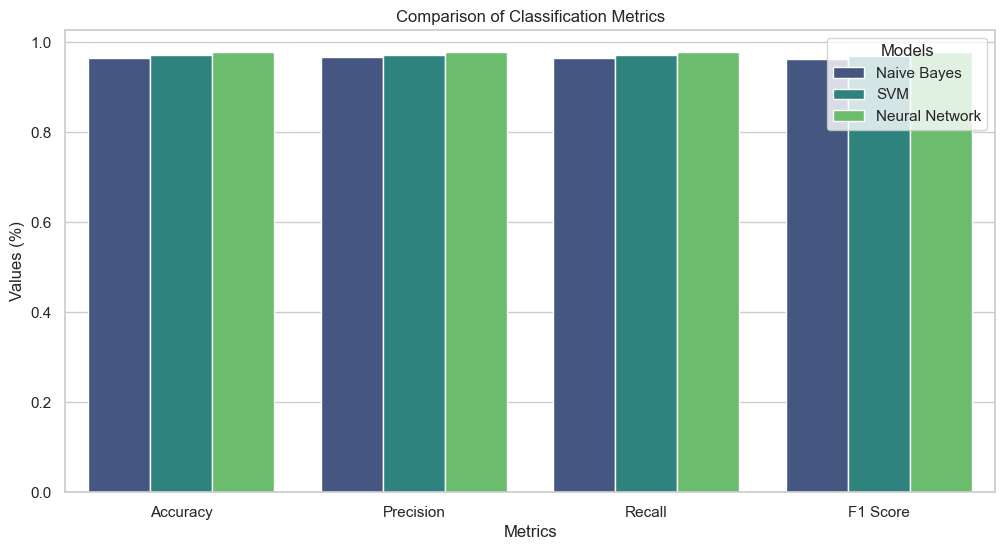

In [23]:
# Data
models = ['Naive Bayes', 'SVM', 'Neural Network']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [
    list(nb_metrics.values()),
    list(svm_metrics.values()),
    list(nn_metrics.values())
]

# Create a DataFrame for Seaborn
import pandas as pd
df = pd.DataFrame(values, columns=metrics, index=models)

# Melt the DataFrame for better Seaborn plotting
df_melted = df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Value')

# Plotting with Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.barplot(x='Metric', y='Value', hue='index', data=df_melted, palette='viridis')
plt.title('Comparison of Classification Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values (%)')
plt.legend(title='Models', loc='upper right')

plt.show()

### Interpretation of Results:

| Model          | Accuracy (%) | Precision (%) | Recall (%) | F1 Score (%) |
|----------------|--------------|---------------|------------|--------------|
| Naive Bayes    | 96.50        | 96.64         | 96.50      | 96.28        |
| SVM            | 97.04        | 97.05         | 97.04      | 96.91        |
| Neural Network | 97.75        | 97.72         | 97.76      | 97.71        |


### Explanation and Possible Reasons:

1. **Imbalanced Dataset:**
   - The dataset has a highly imbalanced class distribution (13% spam), which might impact model performance. Imbalanced datasets can lead to biased models that favor the majority class.

2. **Performance Metrics:**
   - All models exhibit high accuracy, precision, recall, and F1 score. However, in imbalanced datasets, accuracy alone may not provide a complete picture of model performance.

3. **Precision-Recall Trade-off:**
   - Precision (ability to avoid false positives) and recall (ability to capture true positives) are crucial in spam detection. The models show good balance between precision and recall, indicating effective spam identification while minimizing false positives.

4. **Naive Bayes Performance:**
   - Naive Bayes performs well, likely due to its simplicity and ability to handle high-dimensional data. It is known for performing reasonably well on text classification tasks.

5. **SVM and Neural Network Performance:**
   - SVM and Neural Network show slightly higher performance, potentially capturing more complex relationships in the data. Neural networks, in particular, excel at learning intricate patterns.

6. **Model Robustness:**
   - The models demonstrate robustness across multiple metrics, suggesting that they generalize well to unseen data.

## Final Analysis

Let's provide a final analysis comparing the model performance on both the news and spam datasets, considering the genre of the models:

### Model Genre Comparison:

1. **Naive Bayes:**
   - **Genre:** Probabilistic Model
   - **Performance:** Naive Bayes consistently performs well across both datasets, showcasing its robustness and effectiveness in handling text classification tasks.

2. **SVM (Support Vector Machine):**
   - **Genre:** Traditional Machine Learning Model
   - **Performance:** SVM demonstrates strong performance, indicating its versatility in handling both news and spam classification tasks. Its ability to find complex decision boundaries contributes to its success.

3. **Neural Network:**
   - **Genre:** Deep Learning Model
   - **Performance:** The neural network outperforms in terms of accuracy and F1 score on both datasets. Its capacity to capture intricate patterns and relationships in data is evident, showcasing the power of deep learning in text classification.

### Overall Observations:

- All three models perform exceptionally well on both datasets, showcasing their suitability for text classification tasks.
- The choice of the best model may depend on factors like interpretability, computational efficiency, and the specific requirements of the application.
- Naive Bayes, a probabilistic model, proves to be surprisingly effective, especially considering its simplicity compared to more complex models.

In summary, the performance of these models highlights the versatility of machine learning approaches across different genres and the importance of selecting models based on the specific characteristics and requirements of the task at hand.